This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es) and [jorge.calero@urjc.es](mailto:jorge.calero@urjc.es)

This notebook is an introduction to descriptive statistics using pandas. The first step when working with data is to perform an exploratory analysis to get some intuitions about how data is distributed. 


# 1. Load libraries

In [1]:
import pandas as pd #To manipulate data. The equivalent of excel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Difference between both is the existence of indexes

# 2. Pandas

The pandas library includes two types of data structures:

- [**Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) which are one-dimensional ndarray with axis labels (including time series)
- [**DataFrames**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame): Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

Let's see some examples.

## 2.1 Series

In [2]:
s = pd.Series([1,2,3,"catorce"])
print(s)

0          1
1          2
2          3
3    catorce
dtype: object


In [3]:
 s.index
# s[3]
# s[0:3]
# s.values
# s.values * 2

RangeIndex(start=0, stop=4, step=1)

In [4]:
s[3]

'catorce'

In [6]:
s[0:3]

0    1
1    2
2    3
dtype: object

In [7]:
s.values

array([1, 2, 3, 'catorce'], dtype=object)

In [8]:
s.values * 2

array([2, 4, 6, 'catorcecatorce'], dtype=object)

In [9]:
s * 2

0                 2
1                 4
2                 6
3    catorcecatorce
dtype: object

-----------------------------------------------------

Indexes can be easily changed

In [10]:
s = pd.Series(data =[1,2,3,"catorce"], index = ['hola','que','tal','estas'])
print(s)

hola           1
que            2
tal            3
estas    catorce
dtype: object


In [11]:
 s['hola']
# s[0]
# s[0:3]

1

In [13]:
s[0] #I can still getting info by indexing

1

In [12]:
s[0:3]

hola    1
que     2
tal     3
dtype: object

## 2.2 DataFrames

[DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) can be constructed by using:

- Numpy ndarray
- Dictionaries

In [3]:
# from Numpy ndarray
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [37]:
# from dictionary
queen_dict = {}
queen_dict["name"]=["Freddie" ,"Roger", "Brian", "John"]
queen_dict["surname"] = ["Mercury","Taylor", "May", "Deacon"]
queen_dict["year_of_birth"]= [1946,1949, 1947, 1951]

queen_df = pd.DataFrame(data = queen_dict)
queen_df

,name,surname,year_of_birth
0,Freddie,Mercury,1946
1,Roger,Taylor,1949
2,Brian,May,1947
3,John,Deacon,1951


### Pandas operations

In [23]:
#This are main properties
#queen_df.index
queen_df.columns
#queen_df.shape

Index(['name', 'surname', 'year_of_birth'], dtype='object')

In [24]:
queen_df.index

RangeIndex(start=0, stop=4, step=1)

In [25]:
queen_df.shape #Rows, columns

(4, 3)

In [35]:
# change index
queen_df.index = ['voice','drums','guitar','bass']
queen_df

,name,surname,year_of_birth
voice,Freddie,Mercury,1946
drums,Roger,Taylor,1949
guitar,Brian,May,1947
bass,John,Deacon,1951


In [27]:
# reset index
queen_df.reset_index()
#queen_df.reset_index(drop = True)

,index,name,surname,year_of_birth
0,voice,Freddie,Mercury,1946
1,drums,Roger,Taylor,1949
2,guitar,Brian,May,1947
3,bass,John,Deacon,1951


In [28]:
# set index
queen_df.set_index('name',inplace = True)
queen_df

,surname,year_of_birth
name,,
Freddie,Mercury,1946
Roger,Taylor,1949
Brian,May,1947
John,Deacon,1951


In [32]:
# Get column values
queen_df['name'] # note that this is a Series
#queen_df['name'].values

0    Freddie
1      Roger
2      Brian
3       John
Name: name, dtype: object

In [33]:
# Get several columns
queen_df[['surname','name']] # note that this is a DataFrame
#queen_df[['surname','name']].values

,surname,name
0,Mercury,Freddie
1,Taylor,Roger
2,May,Brian
3,Deacon,John


In [36]:
#I have to change indexes so it works with voice example 
# Get rows
queen_df.loc['voice']

#queen_df.loc['voice'].values
#queen_df.loc[['voice','drums'],'name']
#queen_df.loc[['voice','drums'],['name','surname']]
#queen_df.iloc[0]
#queen_df.iloc[0:2]
#queen_df.iloc[0:2,1:]

name             Freddie
surname          Mercury
year_of_birth       1946
Name: voice, dtype: object

In [38]:
#Now with simple index
queen_df.loc[0]

name             Freddie
surname          Mercury
year_of_birth       1946
Name: 0, dtype: object

# 3. Load data in Pandas

## Exercise done in teacher's notebook, pero ya he resuelto el problema del path

In [6]:
df = pd.read_csv('C:\\Users\\riul0\\Desktop\\Inference\\inference_prof\\inference\\data\Datos.csv', sep=";", decimal=',')
df.shape

(173, 9)

In [7]:
# some options
df.head()
df.tail()
df.sample(10)
df.dtypes
df.drop(columns = 'Id')

,Sat_fat_dr,Sat_fat_ffq,Total_fat_dr,Total_fat_ffq,Alcoh_dr,Alcoh_ffq,Calor_dr,Calor_ffq
0,33.20,21.2,81.15,53.8,8.26,1.68,1807,1242.2
1,17.73,10.6,53.28,36.6,0.83,0.00,1418,907.0
2,38.73,23.8,83.48,47.2,20.13,15.10,1889,786.0
3,21.57,22.7,49.65,55.3,11.16,7.49,1426,1392.5
4,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8
5,28.04,15.1,73.83,41.1,1.76,0.00,1699,987.1
6,23.17,17.8,68.29,49.1,22.66,25.06,1700,1189.9
7,19.73,19.1,58.30,48.9,0.00,0.00,1369,1364.1
8,36.31,23.4,92.58,55.4,0.00,0.00,2163,1311.4
9,20.87,16.0,68.44,44.2,0.00,0.00,1609,1200.6


## 3.1 Summary statistics

In [44]:
# Remember¡
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [45]:
# Mean values
df.mean()       # columns (axis=0) 
df.mean(axis=1) # rows

0    2.0
1    5.0
2    8.0
dtype: float64

In [46]:
# standard deviation
df.std(ddof=1) 

a    3.0
b    3.0
c    3.0
dtype: float64

In [47]:
# others
df.count()
#df.min()
#df.median()
#df.max()

a    3
b    3
c    3
dtype: int64

In [51]:
df.min(axis=1)

0    1
1    4
2    7
dtype: int32

In [55]:
df.min()

a    1
b    2
c    3
dtype: int32

In [52]:
df.median(axis=1)

0    2.0
1    5.0
2    8.0
dtype: float64

In [56]:
df.median()

a    4.0
b    5.0
c    6.0
dtype: float64

In [53]:
df.max(axis=1)

0    3
1    6
2    9
dtype: int32

In [57]:
df.max()

a    7
b    8
c    9
dtype: int32

# Solo se puede hacer con las columnas?

In [58]:
# summary
df.describe(percentiles = [.05, .25, .5, .75, .95])

,a,b,c
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
5%,1.3,2.3,3.3
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
95%,6.7,7.7,8.7
max,7.0,8.0,9.0


In [59]:
df.describe(axis=1,percentiles = [.05, .25, .5, .75, .95]) 

TypeError: describe() got an unexpected keyword argument 'axis'

<div class="alert alert-block alert-info">
<b>Exercise:</b> Calculate the mean value of a (random) sample of size 10 for the variable Sat_fat_dr.</div>

In [64]:
np.random.rand(10)

array([0.26680962, 0.09084604, 0.50664257, 0.84775479, 0.77566622,
       0.0618235 , 0.99359704, 0.09262843, 0.76446088, 0.36186593])

In [66]:
Sat_fat_dr = pd.DataFrame(np.random.rand(10))
Sat_fat_dr

,0
0,0.567825
1,0.274565
2,0.775191
3,0.408859
4,0.079030
5,0.009440
6,0.810704
7,0.400540
8,0.371243
9,0.699141


In [68]:
Sat_fat_dr.mean()

0    0.439654
dtype: float64

## 3.2 Filtering

Let's find the rows for which `Alcoh_dr` is 0.

# Resuelto previamente el problema del path¡¡

In [8]:
df[df.Alcoh_dr == 0]

,Id,Sat_fat_dr,Sat_fat_ffq,Total_fat_dr,Total_fat_ffq,Alcoh_dr,Alcoh_ffq,Calor_dr,Calor_ffq
7,107879,19.73,19.1,58.30,48.9,0.0,0.00,1369,1364.1
8,108618,36.31,23.4,92.58,55.4,0.0,0.00,2163,1311.4
9,109000,20.87,16.0,68.44,44.2,0.0,0.00,1609,1200.6
14,109908,25.62,17.4,74.22,51.7,0.0,0.00,1702,1217.7
21,110714,25.10,18.9,80.15,57.5,0.0,0.00,1788,1257.5
33,112738,16.04,17.6,44.23,40.6,0.0,0.00,1183,1326.6
47,114865,29.17,24.8,84.52,71.1,0.0,0.00,1636,1396.7
54,115764,25.47,15.8,75.54,41.6,0.0,1.81,1548,1259.6
58,115879,28.72,35.8,74.26,76.0,0.0,0.00,1641,1961.6
65,129518,20.74,23.7,61.82,68.8,0.0,0.00,1374,1592.4


Now, let's take the cases where `Alcoh_dr` is greater than 0 for the Calors columns.

In [9]:
# option 1
df[df.Alcoh_dr > 0][['Calor_dr','Calor_ffq']]

# option 2
df.loc[df.Alcoh_dr > 0,['Calor_dr','Calor_ffq']]

,Calor_dr,Calor_ffq
0,1807,1242.2
1,1418,907.0
2,1889,786.0
3,1426,1392.5
4,1253,1259.8
5,1699,987.1
6,1700,1189.9
10,1704,1227.4
11,1884,1448.1
12,1518,1367.7


## 3.3 Do some plotting

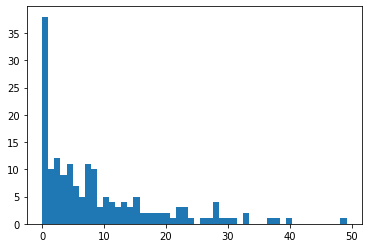

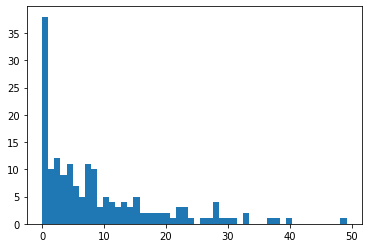

In [10]:
# histograms

# option 1: using pandas
df.Alcoh_dr.hist(bins=50, grid=False)
plt.show()

# option 2: using matplotlib
plt.hist(df.Alcoh_dr.values, bins=50)
plt.show()

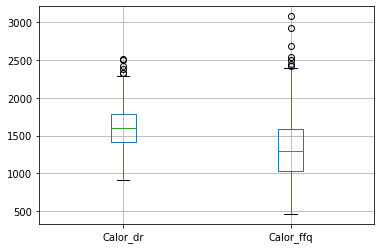

In [11]:
# boxplots
df[['Calor_dr','Calor_ffq']].boxplot()
plt.show()

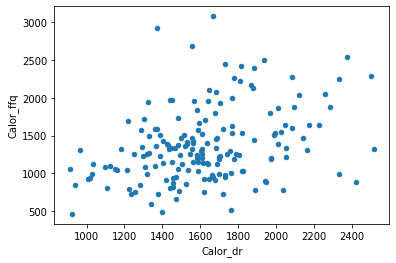

In [12]:
# scatter plots
df.plot.scatter(x = 'Calor_dr', y = 'Calor_ffq')
plt.show()

# References

- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)